<a href="https://colab.research.google.com/github/AmirGhnbr/multi_factor_models/blob/main/multi_factor_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set_theme(context='talk', style='whitegrid',
              palette='colorblind', color_codes=True,
              rc={'figure.figsize':[12,8]})

## Capital Asset Pricing Model (CAMP)

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import datetime

In [ ]:
now = datetime.datetime.utcnow()

ASSET = "AMZN"
MARKET_BENCHMARK = "^GSPC"
START_DATE = "2016-01-01"
END_DATE = now

In [ ]:
df = yf.download([ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 progress=False)
df.tail(10)

Adj Close                    Close                     High  \
                  AMZN        ^GSPC        AMZN        ^GSPC        AMZN   
Date                                                                       
2023-07-11  128.779999  4439.259766  128.779999  4439.259766  129.770004   
2023-07-12  130.800003  4472.160156  130.800003  4472.160156  131.259995   
2023-07-13  134.300003  4510.040039  134.300003  4510.040039  134.669998   
2023-07-14  134.679993  4505.419922  134.679993  4505.419922  136.649994   
2023-07-17  133.559998  4522.790039  133.559998  4522.790039  135.619995   
2023-07-18  132.830002  4554.979980  132.830002  4554.979980  133.860001   
2023-07-19  135.360001  4565.720215  135.360001  4565.720215  135.990005   
2023-07-20  129.960007  4534.870117  129.960007  4534.870117  134.789993   
2023-07-21  130.000000  4536.339844  130.000000  4536.339844  131.369995   
2023-07-24  128.800003  4554.640137  128.800003  4554.640137  131.660004   

                                Low                     Open               \
                  ^GSPC        AMZN        ^GSPC        AMZN        ^GSPC   
Date                                                                        
2023-07-11  4443.640137  127.349998  4408.459961  127.750000  4415.549805   
2023-07-12  4488.339844  128.830002  4463.229980  130.309998  4467.689941   
2023-07-13  4517.379883  132.710007  4489.359863  134.039993  4491.500000   
2023-07-14  4527.759766  134.059998  4499.560059  134.059998  4514.609863   
2023-07-17  4532.850098  133.210007  4504.899902  134.559998  4508.859863   
2023-07-18  4562.299805  131.350006  4514.589844  132.710007  4521.779785   
2023-07-19  4578.430176  132.529999  4557.479980  133.389999  4563.870117   
2023-07-20  4564.740234  129.330002  4527.560059  134.070007  4554.379883   
2023-07-21  4555.000000  128.419998  4535.790039  131.339996  4550.160156   
2023-07-24  4563.410156  128.350006  4541.290039  130.309998  4543.390137   

               Volume              
                 AMZN       ^GSPC  
Date                               
2023-07-11   49951500  3624220000  
2023-07-12   54022800  3920290000  
2023-07-13   61170900  3839530000  
2023-07-14   54388100  3647450000  
2023-07-17   48450200  3538240000  
2023-07-18   54969100  4090010000  
2023-07-19   54531000  4115670000  
2023-07-20   59820600  3761770000  
2023-07-21  133265000  3570190000  
2023-07-24   45591100  3856250000

### Resample to monthly data and calculate simple returns

In [ ]:
X = (
    df['Adj Close']
    .rename(columns={ASSET: 'asset',
                     MARKET_BENCHMARK: 'market'})
    .resample('M')
    .last()
    .pct_change()
    .dropna()
    )
X.tail(10)

,asset,market
Date,,
2022-10-31,-0.093451,0.079863
2022-11-30,-0.057595,0.053753
2022-12-31,-0.129894,-0.058971
2023-01-31,0.227738,0.061753
2023-02-28,-0.086299,-0.026112
2023-03-31,0.096148,0.035052
2023-04-30,0.020912,0.014642
2023-05-31,0.143480,0.002482
2023-06-30,0.081108,0.064727


## Callculate the beta the coefficient of expected market return - risk free rate

In [ ]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta_coeff = covariance / benchmark_variance
beta_coeff

1.264652932242752

the beta is positive which means the asset moves the same direction as market moves but 1.26 times more than the market movement

In [ ]:
# separate target
y = X.pop("asset")

# add constant
X = sm.add_constant(X)
# print(X)
# define and fit the regression model
capm_model = sm.OLS(y, X).fit()

# print results
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     60.17
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.45e-11
Time:                        12:03:07   Log-Likelihood:                 111.90
No. Observations:                  90   AIC:                            -219.8
Df Residuals:                      88   BIC:                            -214.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.008      0.944      0.3

in the equation above supposed the risk-free rate = 0

## Calculate the CAMP with rf

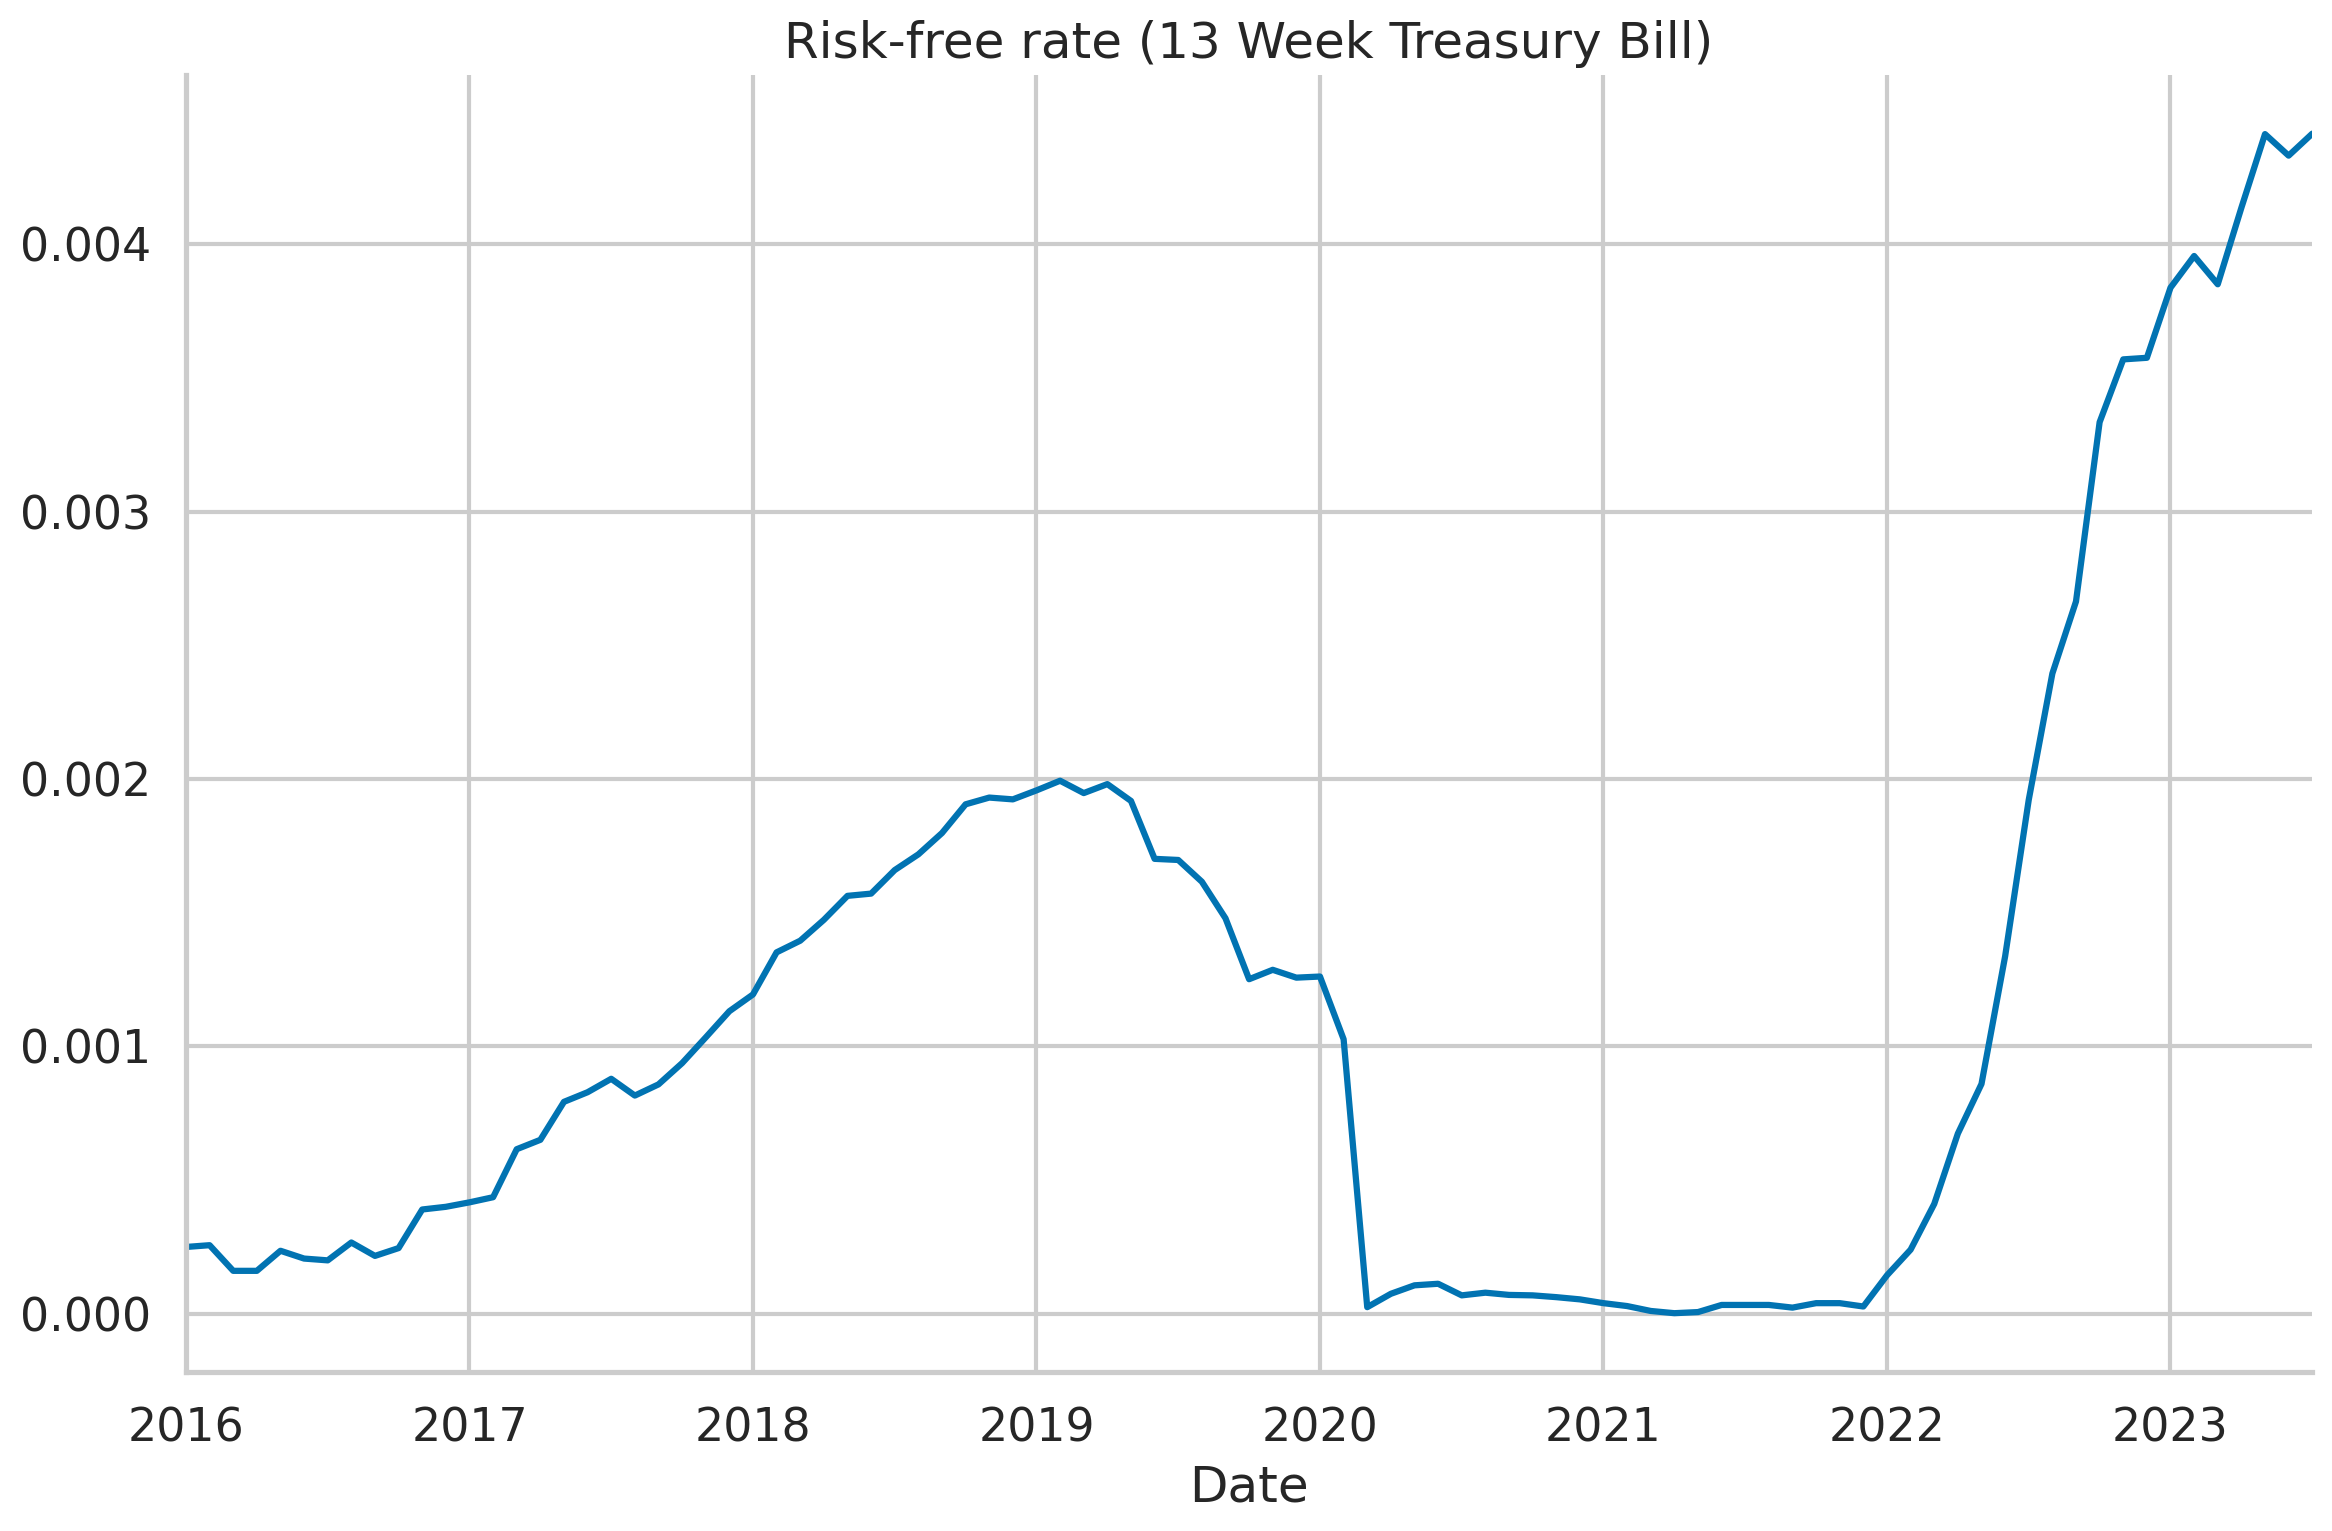

In [ ]:
N_DAYS = 90

# download data from Yahoo finance
df_rf = yf.download("^IRX",
                    start=START_DATE,
                    end=END_DATE,
                    progress=False)

# resample to monthly by taking last value from each month
rf = df_rf.resample("M").last().Close / 100

# calculate the corresponding daily risk-free return
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)

# convert to monthly and subtract 1
rf = (rf ** 30) - 1

# plot the risk-free rate
rf.plot(title="Risk-free rate (13 Week Treasury Bill)")

sns.despine()
plt.tight_layout()

In [ ]:
rf.tail()

Date
2023-03-31    0.003850
2023-04-30    0.004136
2023-05-31    0.004412
2023-06-30    0.004331
2023-07-31    0.004414
Freq: M, Name: Close, dtype: float64

In [ ]:
rf_data = pd.DataFrame(rf)
rf_data

,Close
Date,
2016-01-31,0.000250
2016-02-29,0.000257
2016-03-31,0.000161
2016-04-30,0.000161
2016-05-31,0.000236
...,...
2023-03-31,0.003850
2023-04-30,0.004136
2023-05-31,0.004412


In [ ]:
X = (
    df['Adj Close']
    .rename(columns={ASSET: 'asset',
                     MARKET_BENCHMARK: 'market'})
    .resample('M')
    .last()
    .pct_change()
    .dropna()
    )


In [ ]:
X.tail()

,asset,market
Date,,
2023-03-31,0.096148,0.035052
2023-04-30,0.020912,0.014642
2023-05-31,0.143480,0.002482
2023-06-30,0.081108,0.064727
2023-07-31,-0.011967,0.023427


In [ ]:
X.market -= rf_data['Close']
X.tail()

,asset,market
Date,,
2023-03-31,0.096148,0.031201
2023-04-30,0.020912,0.010506
2023-05-31,0.143480,-0.001930
2023-06-30,0.081108,0.060396
2023-07-31,-0.011967,0.019014


In [ ]:
import statsmodels.formula.api as smf

capm_model = smf.ols(formula="asset ~ market", data=X).fit()

# print results
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     60.22
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.43e-11
Time:                        12:17:39   Log-Likelihood:                 111.92
No. Observations:                  90   AIC:                            -219.8
Df Residuals:                      88   BIC:                            -214.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0087      0.008      1.145      0.2

## Estimating the Fama-French three-factor model

In [ ]:
import pandas_datareader.data as web

In [28]:
ASSET = "AAPL"

In [29]:
ff_dict = web.DataReader("F-F_Research_Data_Factors",
                         "famafrench",
                         start=START_DATE,
                         end=END_DATE)

In [31]:
ff_dict.keys()

dict_keys([0, 1, 'DESCR'])

In [32]:
ff_dict[0]

,Mkt-RF,SMB,HML,RF
Date,,,,
2016-01,-5.77,-3.43,2.09,0.01
2016-02,-0.07,0.71,-0.57,0.02
2016-03,6.96,0.82,1.19,0.02
2016-04,0.91,0.74,3.28,0.01
2016-05,1.78,-0.18,-1.66,0.01
...,...,...,...,...
2023-01,6.65,5.02,-4.05,0.35
2023-02,-2.58,1.21,-0.78,0.34
2023-03,2.51,-5.59,-9.01,0.36


In [33]:
factor_3_df = ff_dict[0].rename(columns={"Mkt-RF": "MKT"}) \
                        .div(100)

factor_3_df.head()

,MKT,SMB,HML,RF
Date,,,,
2016-01,-0.0577,-0.0343,0.0209,0.0001
2016-02,-0.0007,0.0071,-0.0057,0.0002
2016-03,0.0696,0.0082,0.0119,0.0002
2016-04,0.0091,0.0074,0.0328,0.0001
2016-05,0.0178,-0.0018,-0.0166,0.0001


In [34]:
asset_df = yf.download(ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)
asset_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041487,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439018,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980333,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010452,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126842,283192000
...,...,...,...,...,...,...
2023-07-18,193.350006,194.330002,192.419998,193.729996,193.729996,48353800
2023-07-19,193.100006,198.229996,192.649994,195.100006,195.100006,80507300
2023-07-20,195.089996,196.470001,192.500000,193.130005,193.130005,59581200


In [35]:
y = asset_df["Adj Close"].resample("M") \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.to_period("m")
y.name = "rtn"
y.head()

Date
2016-02   -0.001288
2016-03    0.127211
2016-04   -0.139921
2016-05    0.071773
2016-06   -0.042660
Freq: M, Name: rtn, dtype: float64

In [36]:
factor_3_df = factor_3_df.join(y)
factor_3_df["excess_rtn"] = (
    factor_3_df["rtn"] - factor_3_df["RF"]
)
factor_3_df.head()

,MKT,SMB,HML,RF,rtn,excess_rtn
Date,,,,,,
2016-01,-0.0577,-0.0343,0.0209,0.0001,NaN,NaN
2016-02,-0.0007,0.0071,-0.0057,0.0002,-0.001288,-0.001488
2016-03,0.0696,0.0082,0.0119,0.0002,0.127211,0.127011
2016-04,0.0091,0.0074,0.0328,0.0001,-0.139921,-0.140021
2016-05,0.0178,-0.0018,-0.0166,0.0001,0.071773,0.071673


In [39]:
ff_model = smf.ols(formula='excess_rtn ~ MKT + SMB + HML',
                   data = factor_3_df).fit()

print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     34.59
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.17e-14
Time:                        12:43:08   Log-Likelihood:                 127.94
No. Observations:                  88   AIC:                            -247.9
Df Residuals:                      84   BIC:                            -238.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0120      0.006      1.891      0.0

## The rolling three-factor model on portfolio of assets

In [40]:
ASSETS = ["AMZN", "GOOG", "AAPL", "MSFT"]
WEIGHTS = [0.25, 0.25, 0.25, 0.25]

In [41]:
factor_3_df = web.DataReader("F-F_Research_Data_Factors",
                             "famafrench",
                             start=START_DATE,
                             end=END_DATE)[0]
factor_3_df = factor_3_df.div(100)
factor_3_df.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2023-01,0.0665,0.0502,-0.0405,0.0035
2023-02,-0.0258,0.0121,-0.0078,0.0034
2023-03,0.0251,-0.0559,-0.0901,0.0036
2023-04,0.0061,-0.0334,-0.0003,0.0035
2023-05,0.0035,0.0153,-0.0780,0.0036


In [42]:
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)
asset_df.tail()

Adj Close                                           Close  \
                  AAPL        AMZN        GOOG        MSFT        AAPL   
Date                                                                     
2023-07-18  193.729996  132.830002  124.080002  359.489990  193.729996   
2023-07-19  195.100006  135.360001  122.779999  355.079987  195.100006   
2023-07-20  193.130005  129.960007  119.529999  346.869995  193.130005   
2023-07-21  191.940002  130.000000  120.309998  343.769989  191.940002   
2023-07-24  192.750000  128.800003  121.879997  345.109985  192.750000   

                                                      High              ...  \
                  AMZN        GOOG        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2023-07-18  132.830002  124.080002  359.489990  194.330002  133.860001  ...   
2023-07-19  135.360001  122.779999  355.079987  198.229996  135.990005  ...   
2023-07-20  129.960007  119.529999  346.869995  196.470001  134.789993  ...   
2023-07-21  130.000000  120.309998  343.769989  194.970001  131.369995  ...   
2023-07-24  128.800003  121.879997  345.109985  194.910004  131.660004  ...   

                   Low                    Open                          \
                  GOOG        MSFT        AAPL        AMZN        GOOG   
Date                                                                     
2023-07-18  123.300003  342.170013  193.350006  132.710007  124.904999   
2023-07-19  122.470001  352.440002  193.100006  133.389999  124.790001   
2023-07-20  118.684998  345.369995  195.089996  134.070007  122.120003   
2023-07-21  119.070000  339.829987  194.100006  131.339996  120.870003   
2023-07-24  121.379997  342.309998  193.410004  130.309998  121.926003   

                          Volume                                 
                  MSFT      AAPL       AMZN      GOOG      MSFT  
Date                                                             
2023-07-18  345.829987  48353800   54969100  21071200  64872700  
2023-07-19  361.750000  80507300   54531000  22313800  39732900  
2023-07-20  353.570007  59581200   59820600  27541700  33778400  
2023-07-21  349.149994  71917800  133265000  56498100  69368900  
2023-07-24  345.850006  45377800   45591100  22276100  26678100  

[5 rows x 24 columns]

In [43]:
asset_df = asset_df["Adj Close"].resample("M") \
                                .last() \
                                .pct_change() \
                                .dropna()
# reformat index for joining
asset_df.index = asset_df.index.to_period("m")

In [44]:
asset_df["portfolio_returns"] = np.matmul(
    asset_df[ASSETS].values,
    WEIGHTS
)
asset_df.head()

,AAPL,AMZN,GOOG,MSFT,portfolio_returns
Date,,,,,
2016-02,-0.001287,-0.058739,-0.060812,-0.069789,-0.047657
2016-03,0.127211,0.074423,0.067615,0.085495,0.088686
2016-04,-0.139921,0.111094,-0.069723,-0.097049,-0.048900
2016-05,0.071773,0.095817,0.061630,0.070197,0.074854
2016-06,-0.042660,-0.009920,-0.059289,-0.034529,-0.036599


In [45]:
factor_3_df = asset_df.join(factor_3_df).drop(ASSETS, axis=1)
factor_3_df.columns = ["portf_rtn", "mkt", "smb", "hml", "rf"]
factor_3_df["portf_ex_rtn"] = (
    factor_3_df["portf_rtn"] - factor_3_df["rf"]
)

In [46]:
def rolling_factor_model(input_data, formula, window_size):

    coeffs = []

    for start_ind in range(len(input_data) - window_size + 1):
        end_ind = start_ind + window_size

        # define and fit the regression model
        ff_model = smf.ols(
            formula=formula,
            data=input_data[start_ind:end_ind]
        ).fit()

        # store coefficients
        coeffs.append(ff_model.params)

    coeffs_df = pd.DataFrame(
        coeffs,
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df

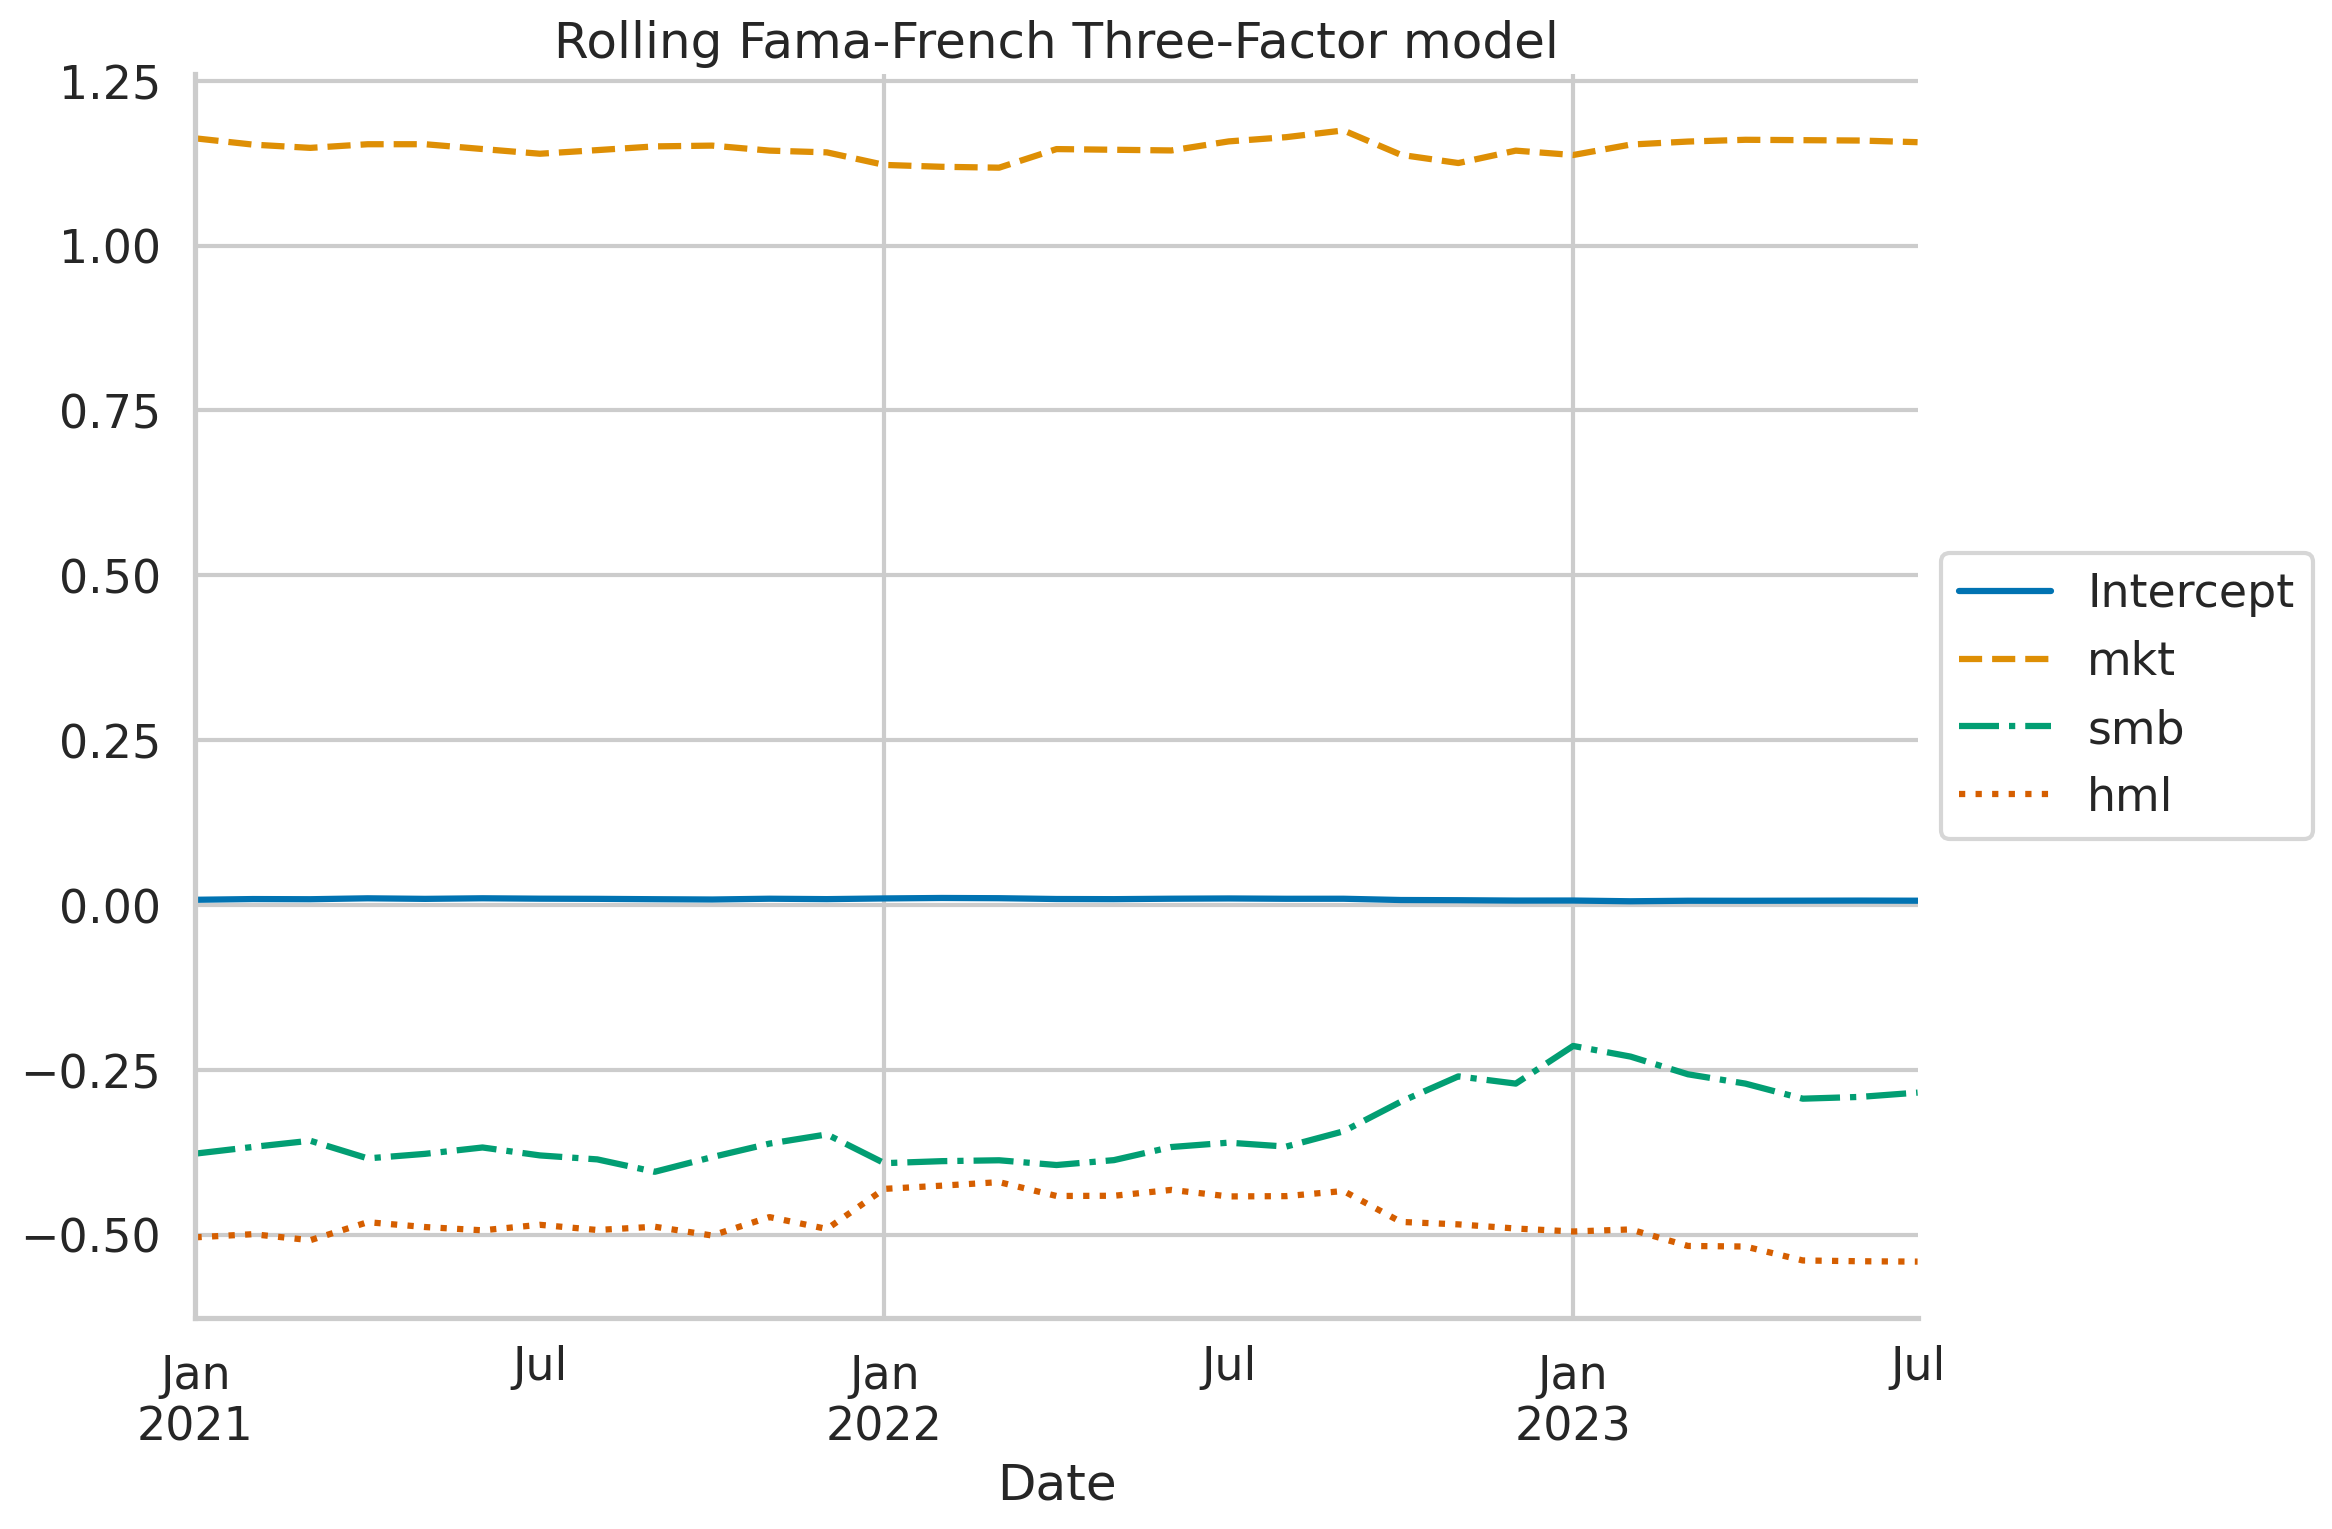

In [47]:
MODEL_FORMULA = "portf_ex_rtn ~ mkt + smb + hml"
results_df = rolling_factor_model(factor_3_df,
                                  MODEL_FORMULA,
                                  window_size=60)
(
    results_df
    .plot(title = "Rolling Fama-French Three-Factor model",
          style=["-", "--", "-.", ":"])
    .legend(loc="center left",bbox_to_anchor=(1.0, 0.5))
)

sns.despine()
plt.tight_layout()

## the four- and five-factor models

In [49]:
ASSET = "TSLA"

In [50]:
# three factors
factor_3_df = web.DataReader("F-F_Research_Data_Factors",
                             "famafrench",
                             start=START_DATE,
                             end=END_DATE)[0]

# momentum factor
momentum_df = web.DataReader("F-F_Momentum_Factor",
                             "famafrench",
                             start=START_DATE,
                             end=END_DATE)[0]

# five factors
factor_5_df = web.DataReader("F-F_Research_Data_5_Factors_2x3",
                             "famafrench",
                             start=START_DATE,
                             end=END_DATE)[0]

In [51]:
asset_df = yf.download(ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)

print(f"Downloaded {asset_df.shape[0]} rows of data.")

Downloaded 1901 rows of data.


In [52]:
y = asset_df["Adj Close"].resample("M") \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.to_period("m")
y.name = "rtn"

In [53]:
factor_4_df = factor_3_df.join(momentum_df).join(y)

factor_4_df.columns = ["mkt", "smb", "hml", "rf", "mom", "rtn"]

factor_4_df.loc[:, factor_4_df.columns != "rtn"] /= 100

factor_4_df["excess_rtn"] = (
    factor_4_df["rtn"] - factor_4_df["rf"]
)

factor_4_df.head()

,mkt,smb,hml,rf,mom,rtn,excess_rtn
Date,,,,,,,
2016-01,-0.0577,-0.0343,0.0209,0.0001,0.0144,NaN,NaN
2016-02,-0.0007,0.0071,-0.0057,0.0002,-0.0438,0.003818,0.003618
2016-03,0.0696,0.0082,0.0119,0.0002,-0.0501,0.197155,0.196955
2016-04,0.0091,0.0074,0.0328,0.0001,-0.0602,0.047830,0.047730
2016-05,0.0178,-0.0018,-0.0166,0.0001,0.0142,-0.072811,-0.072911


In [ ]:
factor_5_df = factor_5_df.join(y)

factor_5_df.columns = [
    "mkt", "smb", "hml", "rmw", "cma", "rf", "rtn"
]

factor_5_df.loc[:, factor_5_df.columns != "rtn"] /= 100

factor_5_df["excess_rtn"] = (
    factor_5_df["rtn"] - factor_5_df["rf"]
)

factor_5_df.head()

In [55]:
four_factor_model = smf.ols(
    formula="excess_rtn ~ mkt + smb + hml + mom",
    data=factor_4_df
).fit()

print(four_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     9.703
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.73e-06
Time:                        13:27:49   Log-Likelihood:                 37.928
No. Observations:                  88   AIC:                            -65.86
Df Residuals:                      83   BIC:                            -53.47
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0249      0.018      1.405      0.1

In [56]:
five_factor_model = smf.ols(
    formula="excess_rtn ~ mkt + smb + hml + rmw + cma",
    data=factor_5_df
).fit()

print(five_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     7.807
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           4.75e-06
Time:                        13:28:03   Log-Likelihood:                 38.180
No. Observations:                  88   AIC:                            -64.36
Df Residuals:                      82   BIC:                            -49.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0278      0.018      1.530      0.1

## cross-sectional factor models using the Fama-MacBeth regression

In [58]:
!pip install -q linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.5 MB/s eta 0:00:00


In [59]:
from linearmodels.asset_pricing import LinearFactorModel

In [60]:
factor_5_df = (
    web.DataReader("F-F_Research_Data_5_Factors_2x3",
                   "famafrench",
                   start=START_DATE,
                   end=END_DATE)[0]
    .div(100)
)
factor_5_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2016-01,-0.0577,-0.0348,0.0209,0.0280,0.0307,0.0001
2016-02,-0.0007,0.0085,-0.0057,0.0328,0.0199,0.0002
2016-03,0.0696,0.0108,0.0119,0.0076,-0.0004,0.0002
2016-04,0.0091,0.0122,0.0328,-0.0292,0.0186,0.0001
2016-05,0.0178,-0.0062,-0.0166,-0.0107,-0.0249,0.0001


In [61]:
portfolio_df = (
    web.DataReader("12_Industry_Portfolios",
                   "famafrench",
                   start=START_DATE,
                   end=END_DATE)[0]
    .div(100)
    .sub(factor_5_df["RF"], axis=0)
)
portfolio_df.head()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2016-01,0.0012,-0.1261,-0.0618,-0.0439,-0.0471,-0.0604,0.0016,0.0465,-0.0417,-0.0998,-0.0969,-0.0620
2016-02,0.0062,0.0404,0.0365,-0.0290,0.0283,-0.0096,0.0091,0.0173,0.0006,-0.0097,-0.0301,0.0399
2016-03,0.0495,0.1076,0.0718,0.1078,0.0595,0.0831,0.0604,0.0784,0.0569,0.0392,0.0659,0.0760
2016-04,0.0028,0.0150,0.0258,0.0910,0.0173,-0.0404,0.0070,-0.0085,-0.0064,0.0493,0.0410,0.0007
2016-05,0.0067,-0.0117,-0.0069,-0.0062,-0.0068,0.0504,0.0029,0.0222,0.0097,0.0238,0.0218,-0.0092


In [62]:
factor_5_df = factor_5_df.drop("RF", axis=1)
factor_5_df.head()

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2016-01,-0.0577,-0.0348,0.0209,0.0280,0.0307
2016-02,-0.0007,0.0085,-0.0057,0.0328,0.0199
2016-03,0.0696,0.0108,0.0119,0.0076,-0.0004
2016-04,0.0091,0.0122,0.0328,-0.0292,0.0186
2016-05,0.0178,-0.0062,-0.0166,-0.0107,-0.0249


In [63]:
five_factor_model = LinearFactorModel(
    portfolios=portfolio_df,
    factors=factor_5_df
)
result = five_factor_model.fit()
print(result)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 12   R-squared:                      0.7454
No. Factors:                          5   J-statistic:                    4.5932
No. Observations:                    89   P-value                         0.7095
Date:                  Tue, Jul 25 2023   Distribution:                  chi2(7)
Time:                          13:34:31                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.0100     0.0053     1.8741     0.0609     -0.0005      0.0204
SMB           -0.0039     0.0070    

In [64]:
print(result.full_summary)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 12   R-squared:                      0.7454
No. Factors:                          5   J-statistic:                    4.5932
No. Observations:                    89   P-value                         0.7095
Date:                  Tue, Jul 25 2023   Distribution:                  chi2(7)
Time:                          13:34:31                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.0100     0.0053     1.8741     0.0609     -0.0005      0.0204
SMB           -0.0039     0.0070    